<a href="https://colab.research.google.com/github/isabela2423/taller-1/blob/main/Taller_final_Sebastian_Alfaro_e_Isabela_Hern%C3%A1ndez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALLER FINAL **
Universidad Externado de Colombia
Finanzas computacionales
Integrantes: Isabela Hernández y Sebastian Alfaro 

**Descripción del problema, justificación y objetivo**

**Descripción problema:**



Construcción aleatoria y optimización de un portafolio Construcción del problema: 
El problema que buscamos resolver en este proyecto es construir un portafolio sharpe en el lenguaje de programación Python. Este proyecto desafía nuestros   conocimientos de nuestra materia de “portafolio” y a su vez   programar y resolver problemas en Python. Ahora bien, Teniendo en cuenta que el portafolio tangente de Sharpe (PT-Sharpe) es un portafolio estructurado para minimizar los riesgos como el portafolio de “mínima varianza” pero a su vez  este busca a la vez la mayor rentabilidad de la inversión posible (siendo este el punto tangente) , su enfoque prioriza la mayor relación Sharpe posible de retornos esperados sobre unidad de riesgo que en este caso permitimos que se permita el proceso en “corto”.
Dicho esto, otro de los desafíos del modelo es mediante una construcción aleatoria encontrar los pesos óptimos para encontrar el portafolio Sharpe. De esta manera se buscará generar una matriz de distribución normal multivariada que genere 10.000 retornos de los activos, con finalidad de obtener los pesos óptimos para cada activo.




**Justificación**
Los activos que quisimos analizar fueron las empresas más grandes en el sector de alimentos y bebidas ,que están en gran parte del mundo y tienen compradas muchas marcas nacionales de muchos países , estas son Nestle (NSRGY), Pepsico(PEP), Coca Cola(KO) y Mc donalds(MCD). Nos pareció interesante construir el taller con base en este sector ya que queríamos analizar un sector en el cual las compañías que lo componen son muy competitivas y abarcan la mayoría del sector del país donde se encuentren, para finalmente ver como se comportarían estas acciones en esta optimización del portafolio. 
los retornos históricos se tomaron desde 2017-12-01  hasta 2022-12-31 (5 años) periodo óptimo para analizar su comportamiento.



**Objetivos: **Analizar los resultados finales con el fin de ver cuáles son las acciones entre 2018 y 2023 con más participación en el primer portafolio  y después comparar los pesos de estas acciones con las optimizadas por los modelos ,también sería interesante encontrar si hay alguna acción que apalanco al portafolio mediante una posición en cortos y que tanto lo hizo.  
A su vez ,El objetivo de nuestro taller será optimizar el portafolio  mediante el modelo   de cvx que consiste para analizar la capacidad de un modelo de optimización y de su optimización en modelos,  también  usaremos Monte Carlo que se utiliza ya que es una técnica que se usa para determinar la de probabilidad de algo en específico ,que generar muchas muestras aleatorias y generar su distribución en el modelo propuesto y en este caso los pesos del portafolio tangente de Sharpe mediante la simulación de una matriz de la distribución normal multivariada de 10000 retornos de los activos, con finalidad de obtener los pesos óptimos para cada activo. De esta manera, se podrá elaborar un problema de optimización de portafolios con base a códigos que se utilizaron como material de la clase y códigos que fueron investigados por fuera de la clase, como base de apoyo para la construcción del taller (para construir la matriz de distribución normal multivariada)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy import stats
from scipy.stats import norm
!pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

Construcción aleatoria y optimización portafolio

[*********************100%***********************]  4 of 4 completed


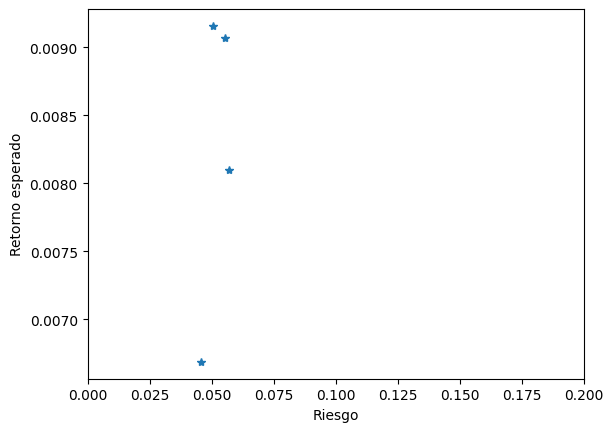

In [ ]:
#Construcción del portafolio con los activos de Nestle (NSRGY), Pepsico(PEP), Coca Cola(KO) y Mc donalds(MCD)
activos = ['NSRGY', 'PEP', 'KO', 'MCD']
precios = yf.download(activos, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()
plt.plot(sigma, mu, '*')
plt.ylabel("Retorno esperado")
plt.xlabel("Riesgo")
plt.xlim(0,0.2)
plt.show();

In [ ]:
#Portafolio de Sharpe 
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt1 = x.value/x.value.sum()
wpt1

array([-1.32001617e-20,  2.94466939e-01,  2.37544795e-01,  4.67988266e-01])

In [ ]:
#Construcción de la matriz de la distribución normal multivariada de 10000 pesos del portafolio tangente de Sharpe de los activos.
#Esto se realizo por cada activo, para finalmente unirlo en un Data Frame (z) y generar una sola matriz a la cual se le calcula la media
# y la covarianza. Finalmente, de los datos de mu y cov de la matriz, se puede optimizar mediante cvx.
for i in range(10000):
 DistrbM=np.random.multivariate_normal(mu,cov,10000)
 DistrbM
 pd.DataFrame(DistrbM)
 #Se saca la media y covarianzas de la matriz de la distribución normal multivariada de los activos 
 col_means = np.mean(DistrbM, axis=0)
 cov_DistrbM = np.cov(DistrbM, rowvar=False)
 #Se optimiza con el uso de la media y covarianza que dio anteriormente 
 x = cp.Variable(n)
 objetivo = cp.Minimize(cp.quad_form(x, cov_DistrbM))
 restricciones = [x @ col_means == 1, x >= 0]
 prob = cp.Problem(objetivo, restricciones)
 prob.solve()
 wpt = x.value/x.value.sum()
 


In [ ]:
#A partir de la simulación generada conforme a los parámetros obtenidos de los retornos de las acciones, encontramos los pesos óptimos para cada activo que maximizan el ratio de Sharpe
wpt

array([-2.48464512e-21,  3.87129846e-01,  2.38032096e-01,  3.74838058e-01])

In [ ]:
#Para concluir con el fin de analizar los resultados de los pesos encontramos en la primera obtencion de los pesos :
#([-1.32001617e-20,  2.94466939e-01,  2.37544795e-01,  4.67988266e-01])
#Nestle, Pepsico, Coca Cola y Mc cada uno respectivamente siendo mc donalds con el mayor tamaño con el 46% del portafolio seguido por  pepsi con 29% y cocacola con 23% ,sin embargo  
#nestle va en cortos pero no es tan significante ni alcanza apalancar .Ahora bien despues de aplicar los modelos y optimizar los pesos encontramos los siguientes coeficiientes
#(-2.48464512e-21,  3.87129846e-01,  2.38032096e-01,  3.74838058e-01) en este caso encontramos que la accion con mayor porcentage en el portafolio es pepsi y en segundo lugar mc donalds ,seguido por cocacola e 
#igualmente nestle trabaja en cortos pero es muy pequeño su tamaño en el portafolio